In [111]:
import pandas as pd
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import glob

In [112]:
xy_list = ['Age', 'Sex', 'Systolic BP', 'Cholesterol', 'Fasting Blood Sugar', 'Max Heart Rate']
x_list = ['Age', 'Systolic BP', 'Fasting Blood Sugar', 'Max Heart Rate']
y_list = ['Cholesterol']

In [113]:
all_files = glob.glob('Clean Data/*.csv')
all_files

['Clean Data/Mendeley1_cleaned.csv',
 'Clean Data/Framingham1.csv',
 'Clean Data/Kaggle1.csv',
 'Clean Data/UCI Heart Disease.csv',
 'Clean Data/Kaggle2.csv']

In [114]:
from itertools import combinations
cvs_lst = []

for filename in all_files:
    df = pd.read_csv(filename)
    cvs_lst.append(df)
combination = pd.concat(cvs_lst, ignore_index=True)

full_df = combination[xy_list]
full_df


,Age,Sex,Systolic BP,Cholesterol,Fasting Blood Sugar,Max Heart Rate,Result
0,64,Male,160.0,NaN,1,163.2,negative
1,21,Male,98.0,NaN,1,193.3,positive
2,55,Male,160.0,NaN,1,169.5,negative
3,64,Male,120.0,NaN,1,163.2,positive
4,55,Male,112.0,NaN,1,169.5,negative
...,...,...,...,...,...,...,...
7775,45,Male,110.0,264.0,0,132.0,1
7776,68,Male,144.0,193.0,1,141.0,1
7777,57,Male,130.0,131.0,0,115.0,1
7778,57,Female,130.0,236.0,0,174.0,1


In [120]:
full_df.shape

(7780, 7)

In [115]:
full_df.loc[:, 'Result'] = full_df['Result'].apply(lambda x: x if isinstance(x, int) else 1 if x == 'Positive' else 0)
full_df

,Age,Sex,Systolic BP,Cholesterol,Fasting Blood Sugar,Max Heart Rate,Result
0,64,Male,160.0,NaN,1,163.2,0
1,21,Male,98.0,NaN,1,193.3,0
2,55,Male,160.0,NaN,1,169.5,0
3,64,Male,120.0,NaN,1,163.2,0
4,55,Male,112.0,NaN,1,169.5,0
...,...,...,...,...,...,...,...
7775,45,Male,110.0,264.0,0,132.0,1
7776,68,Male,144.0,193.0,1,141.0,1
7777,57,Male,130.0,131.0,0,115.0,1
7778,57,Female,130.0,236.0,0,174.0,1


In [123]:
to_predict = full_df[full_df['Cholesterol'].isna()]
to_train = full_df[~full_df['Cholesterol'].isna()]
female_to_predict = to_predict[to_predict['Sex'] == 'Female']
male_to_predict = to_predict[to_predict['Sex'] == 'Male']
female_to_train = to_train[to_train['Sex'] == 'Female']
male_to_train = to_train[to_train['Sex'] == 'Male']

In [124]:
female_to_predict_health = female_to_predict[female_to_predict['Result'] == 0]
female_to_predict_unhealth = female_to_predict[female_to_predict['Result'] == 1]
male_to_predict_health = male_to_predict[male_to_predict['Result'] == 0]
male_to_predict_unhealth = male_to_predict[male_to_predict['Result'] == 1]
female_to_train_health = female_to_train[female_to_train['Result'] == 0]
female_to_train_unhealth = female_to_train[female_to_train['Result'] == 1]
male_to_train_health = male_to_train[male_to_train['Result'] == 0]
male_to_train_unhealth = male_to_train[male_to_train['Result'] == 1]

In [125]:
# prompt: find the woman in the to_predict
M_H_X = np.array(male_to_train_health[x_list])
M_H_Y = np.array(male_to_train_health[y_list])
M_U_X = np.array(male_to_train_unhealth[x_list])
M_U_Y = np.array(male_to_train_unhealth[y_list])
F_H_X = np.array(female_to_train_health[x_list])
F_H_Y = np.array(female_to_train_health[y_list])
F_U_X = np.array(female_to_train_unhealth[x_list])
F_U_Y = np.array(female_to_train_unhealth[y_list])

In [126]:
# for health male
linearModel = LinearRegression()

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(M_H_X, M_H_Y, train_size=0.9)

linearModel.fit(X_train_male, y_train_male)

y_predict = linearModel.predict(X_test_male)



In [127]:
mse_male = mean_squared_error(y_test_male, y_predict)
r2_male = r2_score(y_test_male, y_predict)
mse_male, r2_male

(2853.312804022626, 0.0030243559958852417)

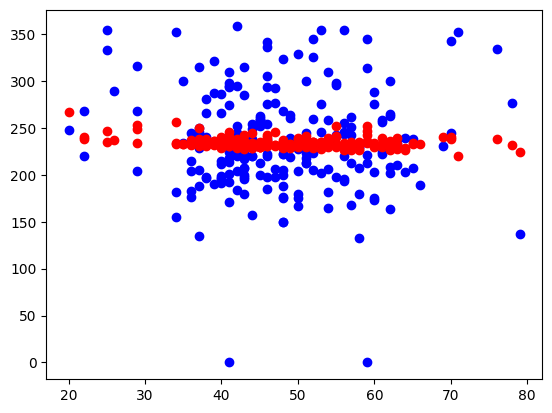

In [128]:
plt.scatter(X_test_male[:, 0], y_test_male, color='blue', label='Actual')
plt.scatter(X_test_male[:, 0], y_predict, color='red', label='Predicted')

In [129]:
full_df.to_csv('Clean Data/full_df.csv', index=False)